In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install -q pycaret # need restart runtime

In [ ]:
import pandas as pd, numpy as np, re, time

# Load the data
data = pd.read_csv('/content/gdrive/My Drive/data/hackathon_train.csv', sep=',', encoding="UTF-8")
data.head()

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.2
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.1
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.4
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.0
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.1


In [ ]:
pip install -U pandas-profiling[notebook]

In [ ]:
from pandas_profiling import ProfileReport

# Explore the data
ProfileReport(data)

In [ ]:
import re 
import string
# from nltk.stem.porter import PorterStemmer

# ps = PorterStemmer()

# Define a function to clean the data
def clean_text_round1(text):
    text = text.lower() #lower case
    text = re.sub("[^a-zA-Z]",' ',text) # remove any character that is not a word
    # text = ps.stem(text) # stemming the text
    return text

round1 = lambda x:clean_text_round1(x)

In [ ]:
data_clean = data.copy() # copy the original dataframe
data_clean.text = pd.DataFrame(data.text.apply(round1)) # clean the data
data_clean # display results

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,tennessee we re the best state nobody even c...,1,2.42,1.0,0.20
1,2,a man inserted an advertisement in the classif...,1,2.50,1.0,1.10
2,3,how many men does it take to open a can of bee...,1,1.95,0.0,2.40
3,4,told my mom i hit twitter followers she ...,1,2.11,1.0,0.00
4,5,roses are dead love is fake weddings are bas...,1,2.78,0.0,0.10
...,...,...,...,...,...,...
7995,7996,lack of awareness of the pervasiveness of raci...,0,NaN,NaN,0.25
7996,7997,why are aspirins white because they work sorry,1,1.33,0.0,3.85
7997,7998,today we americans celebrate our independence...,1,2.55,0.0,0.00
7998,7999,how to keep the flies off the bride at an ital...,1,1.00,0.0,3.00


In [ ]:
# Define stop words
our_stopwords = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into',
'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more',
'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does',
'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't',
'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']

In [ ]:
# Convert from set to frozenset
our_stopwords= frozenset(our_stopwords)
type(our_stopwords)

frozenset

In [ ]:
# Define a function to add length of text as a feature
def add_len(df):
    # df.insert(2,'len',df.text.str.split().str.len().astype(float),True)
    df.insert(2,'len',df.text.str.split().str.len(),True)
    return df

In [ ]:
data_clean = add_len(data_clean) # call the function
data_clean['humor_rating'] = data_clean['humor_rating'].fillna(0) # fill missing values with zeros
data_clean # display results

,id,text,len,is_humor,humor_rating,humor_controversy,offense_rating
0,1,tennessee we re the best state nobody even c...,18,1,2.42,1.0,0.20
1,2,a man inserted an advertisement in the classif...,31,1,2.50,1.0,1.10
2,3,how many men does it take to open a can of bee...,26,1,1.95,0.0,2.40
3,4,told my mom i hit twitter followers she ...,26,1,2.11,1.0,0.00
4,5,roses are dead love is fake weddings are bas...,12,1,2.78,0.0,0.10
...,...,...,...,...,...,...,...
7995,7996,lack of awareness of the pervasiveness of raci...,28,0,0.00,NaN,0.25
7996,7997,why are aspirins white because they work sorry,8,1,1.33,0.0,3.85
7997,7998,today we americans celebrate our independence...,14,1,2.55,0.0,0.00
7998,7999,how to keep the flies off the bride at an ital...,20,1,1.00,0.0,3.00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text using TFIDF
cv = TfidfVectorizer(strip_accents = 'ascii', stop_words=our_stopwords,max_features = 5000)
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm # display results

,abc,ability,able,abraham,abroad,absolutely,academy,accept,acceptable,accepted,accepting,access,accident,accidentally,according,account,accurate,accused,acid,acids,ackles,acne,across,act,acting,action,actions,active,activity,actor,actors,acts,actual,actually,ad,adapt,add,added,addicted,addiction,adding,address,adele,adjust,admit,adorable,adrenaline,ads,adult,adults,advantage,adventure,adventures,advice,af,affair,affected,afford,afraid,africa,african,afropunk,afternoon,age,agent,ages,aging,ago,agree,ah,ahead,aid,aids,ain,air,aircraft,aired,airline,airlines,airplane,airplanes,airport,al,alabama,alarm,albert,album,alcohol,alcoholic,alert,alexa,algorithm,alive,allahu,allergy,allies,allow,allowed,allows,almost,alone,along,alphabet,already,alright,also,always,alzheimer,amazing,amazon,ambulance,america,american,americans,among,amount,amputee,anal,ancient,angel,angels,anger,angry,animal,animals,anime,ankle,anne,anniversary,announce,announced,announcement,annoy,annoyed,annoying,another,answer,answered,answers,ant,antarctica,anti,antioxidant,antioxidants,ants,anxiety,anybody,anymore,anyone,anything,anyway,anyways,anywhere,apart,apartment,apology,app,apparently,appear,appearance,apple,apples,apply,applying,appreciate,appreciated,approach,approaches,approaching,appropriate,approximately,april,aquatics,arab,arabs,arava,area,areas,aren,argue,arguing,argument,arguments,arizona,arkansas,arm,armed,arms,armstrong,army,arnold,around,aroused,arrest,arrested,arresting,arrive,arrived,arrives,arrow,art,article,artist,artists,arts,ash,ashamed,asia,asian,asians,aside,ask,asked,asking,asks,asleep,ass,asshole,associated,assume,assured,astronaut,astronauts,ate,atomic,attack,attacked,attacking,attacks,attempt,attempting,attendant,attention,attic,attitude,attorney,attract,attracted,attraction,attractive,audience,august,auntie,aunties,author,authority,autism,auto,autumn,available,...,view,views,vikings,villains,vincent,vinegar,vinson,violence,violent,virgin,virginity,virus,visibility,vision,visit,visits,vit,vitamin,vitamins,voice,voicemail,voices,volume,volunteer,vote,voted,voter,voting,vow,vs,vulnerable,waffle,waist,wait,waiter,waiting,waitress,waits,wake,wakes,waking,wal,waldman,walk,walked,walkers,walking,walks,wall,wallet,walls,walmart,walt,wanna,want,wanted,wanting,wants,war,wardrobe,warm,warned,warning,wars,wash,washing,washington,wasn,wasp,waste,wasted,wasting,watch,watched,watches,watching,water,watermelon,waterproof,wave,waves,waving,way,wayne,ways,weak,weaker,weakness,wealth,wealthy,weapon,weapons,wear,wearing,wears,weather,web,webmd,website,wedding,weed,week,weekend,weekends,weekly,weeks,weigh,weighed,weighs,weight,weird,welcome,well,wellness,went,weren,west,western,wet,whale,whales,whatever,whats,wheel,wheelchair,wheelchairs,wheels,whenever,wherever,whether,whilst,whiskey,whisper,whispering,whispers,whistle,white,whites,whoa,whoever,whole,whose,wi,wide,widow,wife,wifi,wig,wild,wildlife,wildly,williams,willing,willy,wilson,win,wind,window,wine,wing,wings,wink,winning,wins,winter,wisdom,wise,wish,wishes,wishing,witch,within,without,witness,witnesses,wives,wizard,woke,woman,women,won,wonder,wondered,wonderful,wondering,wonders,wonka,wood,wooden,woods,word,words,work,worked,worker,workers,working,workout,works,world,worried,worry,worrying,worse,worst,worth,would,wouldn,wounds,wow,wrapped,wrinkles,write,writer,writers,writes,writing,written,wrong,wrote,wtf,wurst,ya,yard,yeah,year,years,yell,yelled,yelling,yellow,yells,yes,yesterday,yet,yo,yodas,yoghurt,yogurt,york,young,younger,youth,youtube,yr,yup,zebra,zero,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0

In [ ]:
data_dtm.insert(0,'len',data_clean.len,True) # insert length feature
# data_dtm.insert(1,'is_humor',data_clean['is_humor'].astype(float),True) # insert is_humor feature
data_dtm.insert(1,'humor_rating',data_clean['humor_rating'],True) # insert humor_rating feature
data_dtm # display results

,len,humor_rating,abc,ability,able,abraham,abroad,absolutely,academy,accept,acceptable,accepted,accepting,access,accident,accidentally,according,account,accurate,accused,acid,acids,ackles,acne,across,act,acting,action,actions,active,activity,actor,actors,acts,actual,actually,ad,adapt,add,added,addicted,addiction,adding,address,adele,adjust,admit,adorable,adrenaline,ads,adult,adults,advantage,adventure,adventures,advice,af,affair,affected,afford,afraid,africa,african,afropunk,afternoon,age,agent,ages,aging,ago,agree,ah,ahead,aid,aids,ain,air,aircraft,aired,airline,airlines,airplane,airplanes,airport,al,alabama,alarm,albert,album,alcohol,alcoholic,alert,alexa,algorithm,alive,allahu,allergy,allies,allow,allowed,allows,almost,alone,along,alphabet,already,alright,also,always,alzheimer,amazing,amazon,ambulance,america,american,americans,among,amount,amputee,anal,ancient,angel,angels,anger,angry,animal,animals,anime,ankle,anne,anniversary,announce,announced,announcement,annoy,annoyed,annoying,another,answer,answered,answers,ant,antarctica,anti,antioxidant,antioxidants,ants,anxiety,anybody,anymore,anyone,anything,anyway,anyways,anywhere,apart,apartment,apology,app,apparently,appear,appearance,apple,apples,apply,applying,appreciate,appreciated,approach,approaches,approaching,appropriate,approximately,april,aquatics,arab,arabs,arava,area,areas,aren,argue,arguing,argument,arguments,arizona,arkansas,arm,armed,arms,armstrong,army,arnold,around,aroused,arrest,arrested,arresting,arrive,arrived,arrives,arrow,art,article,artist,artists,arts,ash,ashamed,asia,asian,asians,aside,ask,asked,asking,asks,asleep,ass,asshole,associated,assume,assured,astronaut,astronauts,ate,atomic,attack,attacked,attacking,attacks,attempt,attempting,attendant,attention,attic,attitude,attorney,attract,attracted,attraction,attractive,audience,august,auntie,aunties,author,authority,autism,auto,...,view,views,vikings,villains,vincent,vinegar,vinson,violence,violent,virgin,virginity,virus,visibility,vision,visit,visits,vit,vitamin,vitamins,voice,voicemail,voices,volume,volunteer,vote,voted,voter,voting,vow,vs,vulnerable,waffle,waist,wait,waiter,waiting,waitress,waits,wake,wakes,waking,wal,waldman,walk,walked,walkers,walking,walks,wall,wallet,walls,walmart,walt,wanna,want,wanted,wanting,wants,war,wardrobe,warm,warned,warning,wars,wash,washing,washington,wasn,wasp,waste,wasted,wasting,watch,watched,watches,watching,water,watermelon,waterproof,wave,waves,waving,way,wayne,ways,weak,weaker,weakness,wealth,wealthy,weapon,weapons,wear,wearing,wears,weather,web,webmd,website,wedding,weed,week,weekend,weekends,weekly,weeks,weigh,weighed,weighs,weight,weird,welcome,well,wellness,went,weren,west,western,wet,whale,whales,whatever,whats,wheel,wheelchair,wheelchairs,wheels,whenever,wherever,whether,whilst,whiskey,whisper,whispering,whispers,whistle,white,whites,whoa,whoever,whole,whose,wi,wide,widow,wife,wifi,wig,wild,wildlife,wildly,williams,willing,willy,wilson,win,wind,window,wine,wing,wings,wink,winning,wins,winter,wisdom,wise,wish,wishes,wishing,witch,within,without,witness,witnesses,wives,wizard,woke,woman,women,won,wonder,wondered,wonderful,wondering,wonders,wonka,wood,wooden,woods,word,words,work,worked,worker,workers,working,workout,works,world,worried,worry,worrying,worse,worst,worth,would,wouldn,wounds,wow,wrapped,wrinkles,write,writer,writers,writes,writing,written,wrong,wrote,wtf,wurst,ya,yard,yeah,year,years,yell,yelled,yelling,yellow,yells,yes,yesterday,yet,yo,yodas,yoghurt,yogurt,york,young,younger,youth,youtube,yr,yup,zebra,zero,zone,zoo
0,18,2.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0

In [ ]:
# from pycaret.classification import *
from pycaret.regression import *

In [ ]:
data_dtm = data_dtm.assign(offense_rating = data_clean.offense_rating) # insert offense_rating label
data_dtm # display results

,len,humor_rating,abc,ability,able,abraham,abroad,absolutely,academy,accept,acceptable,accepted,accepting,access,accident,accidentally,according,account,accurate,accused,acid,acids,ackles,acne,across,act,acting,action,actions,active,activity,actor,actors,acts,actual,actually,ad,adapt,add,added,addicted,addiction,adding,address,adele,adjust,admit,adorable,adrenaline,ads,adult,adults,advantage,adventure,adventures,advice,af,affair,affected,afford,afraid,africa,african,afropunk,afternoon,age,agent,ages,aging,ago,agree,ah,ahead,aid,aids,ain,air,aircraft,aired,airline,airlines,airplane,airplanes,airport,al,alabama,alarm,albert,album,alcohol,alcoholic,alert,alexa,algorithm,alive,allahu,allergy,allies,allow,allowed,allows,almost,alone,along,alphabet,already,alright,also,always,alzheimer,amazing,amazon,ambulance,america,american,americans,among,amount,amputee,anal,ancient,angel,angels,anger,angry,animal,animals,anime,ankle,anne,anniversary,announce,announced,announcement,annoy,annoyed,annoying,another,answer,answered,answers,ant,antarctica,anti,antioxidant,antioxidants,ants,anxiety,anybody,anymore,anyone,anything,anyway,anyways,anywhere,apart,apartment,apology,app,apparently,appear,appearance,apple,apples,apply,applying,appreciate,appreciated,approach,approaches,approaching,appropriate,approximately,april,aquatics,arab,arabs,arava,area,areas,aren,argue,arguing,argument,arguments,arizona,arkansas,arm,armed,arms,armstrong,army,arnold,around,aroused,arrest,arrested,arresting,arrive,arrived,arrives,arrow,art,article,artist,artists,arts,ash,ashamed,asia,asian,asians,aside,ask,asked,asking,asks,asleep,ass,asshole,associated,assume,assured,astronaut,astronauts,ate,atomic,attack,attacked,attacking,attacks,attempt,attempting,attendant,attention,attic,attitude,attorney,attract,attracted,attraction,attractive,audience,august,auntie,aunties,author,authority,autism,auto,...,views,vikings,villains,vincent,vinegar,vinson,violence,violent,virgin,virginity,virus,visibility,vision,visit,visits,vit,vitamin,vitamins,voice,voicemail,voices,volume,volunteer,vote,voted,voter,voting,vow,vs,vulnerable,waffle,waist,wait,waiter,waiting,waitress,waits,wake,wakes,waking,wal,waldman,walk,walked,walkers,walking,walks,wall,wallet,walls,walmart,walt,wanna,want,wanted,wanting,wants,war,wardrobe,warm,warned,warning,wars,wash,washing,washington,wasn,wasp,waste,wasted,wasting,watch,watched,watches,watching,water,watermelon,waterproof,wave,waves,waving,way,wayne,ways,weak,weaker,weakness,wealth,wealthy,weapon,weapons,wear,wearing,wears,weather,web,webmd,website,wedding,weed,week,weekend,weekends,weekly,weeks,weigh,weighed,weighs,weight,weird,welcome,well,wellness,went,weren,west,western,wet,whale,whales,whatever,whats,wheel,wheelchair,wheelchairs,wheels,whenever,wherever,whether,whilst,whiskey,whisper,whispering,whispers,whistle,white,whites,whoa,whoever,whole,whose,wi,wide,widow,wife,wifi,wig,wild,wildlife,wildly,williams,willing,willy,wilson,win,wind,window,wine,wing,wings,wink,winning,wins,winter,wisdom,wise,wish,wishes,wishing,witch,within,without,witness,witnesses,wives,wizard,woke,woman,women,won,wonder,wondered,wonderful,wondering,wonders,wonka,wood,wooden,woods,word,words,work,worked,worker,workers,working,workout,works,world,worried,worry,worrying,worse,worst,worth,would,wouldn,wounds,wow,wrapped,wrinkles,write,writer,writers,writes,writing,written,wrong,wrote,wtf,wurst,ya,yard,yeah,year,years,yell,yelled,yelling,yellow,yells,yes,yesterday,yet,yo,yodas,yoghurt,yogurt,york,young,younger,youth,youtube,yr,yup,zebra,zero,zone,zoo,offense_rating
0,18,2.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
# setup the dataset
grid = setup(data=data_dtm, target=data_dtm.columns[-1], html=False, silent=True, verbose=False)

In [ ]:
# evaluate models and compare models
best_model = compare_models(sort = 'MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,5.4984,109.6035,10.1989,-116.9875,1.4816,24.9327,28.202


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.7043,0.9361,0.9665,-0.0015,0.4736,2.0299,0.260
lr,Linear Regression,5.4984,109.6035,10.1989,-116.9875,1.4816,24.9327,28.202


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,0.5283,0.7264,0.4331,0.3559,1.7844,3.445
lasso,Lasso Regression,0.7043,0.9361,0.9665,-0.0015,0.4736,2.0299,0.260
lr,Linear Regression,5.4984,109.6035,10.1989,-116.9875,1.4816,24.9327,28.202


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,0.5283,0.7264,0.4331,0.3559,1.7844,3.445
en,Elastic Net,0.7023,0.9322,0.9645,0.0027,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,0.9361,0.9665,-0.0015,0.4736,2.0299,0.260
lr,Linear Regression,5.4984,109.6035,10.1989,-116.9875,1.4816,24.9327,28.202


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260
lr,Linear Regression,5.4984,1.096035e+02,10.1989,-1.169875e+02,1.4816,24.9327,28.202
lar,Least Angle Regression,5064.0073,4.392120e+10,79583.5865,-4.946673e+10,0.4891,2583.2981,3.904


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260
llar,Lasso Least Angle Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,2.533
lr,Linear Regression,5.4984,1.096035e+02,10.1989,-1.169875e+02,1.4816,24.9327,28.202
lar,Least Angle Regression,5064.0073,4.392120e+10,79583.5865,-4.946673e+10,0.4891,2583.2981,3.904


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260
llar,Lasso Least Angle Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,2.533
lr,Linear Regression,5.4984,1.096035e+02,10.1989,-1.169875e+02,1.4816,24.9327,28.202
lar,Least Angle Regression,5064.0073,4.392120e+10,79583.5865,-4.946673e+10,0.4891,2583.2981,3.904


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260
llar,Lasso Least Angle Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,2.533
lr,Linear Regression,5.4984,1.096035e+02,10.1989,-1.169875e+02,1.4816,24.9327,28.202
lar,Least Angle Regression,5064.0073,4.392120e+10,79583.5865,-4.946673e+10,0.4891,2583.2981,3.904


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260
llar,Lasso Least Angle Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,2.533
par,Passive Aggressive Regressor,1.0100,2.027200e+00,1.3089,-1.138600e+00,0.5635,3.6752,3.580
lr,Linear Regression,5.4984,1.096035e+02,10.1989,-1.169875e+02,1.4816,24.9327,28.202
lar,Least Angle Regression,5064.0073,4.392120e+10,79583.5865,-4.946673e+10,0.4891,2583.2981,3.904


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260
llar,Lasso Least Angle Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,2.533
par,Passive Aggressive Regressor,1.0100,2.027200e+00,1.3089,-1.138600e+00,0.5635,3.6752,3.580
lr,Linear Regression,5.4984,1.096035e+02,10.1989,-1.169875e+02,1.4816,24.9327,28.202
lar,Least Angle Regression,5064.0073,4.392120e+10,79583.5865,-4.946673e+10,0.4891,2583.2981,3.904


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260
llar,Lasso Least Angle Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,2.533
par,Passive Aggressive Regressor,1.0100,2.027200e+00,1.3089,-1.138600e+00,0.5635,3.6752,3.580
lr,Linear Regression,5.4984,1.096035e+02,10.1989,-1.169875e+02,1.4816,24.9327,28.202


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
dt,Decision Tree Regressor,0.4935,7.982000e-01,0.8930,1.410000e-01,0.4269,1.6659,11.640
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260
llar,Lasso Least Angle Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,2.533
par,Passive Aggressive Regressor,1.0100,2.027200e+00,1.3089,-1.138600e+00,0.5635,3.6752,3.580


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3967,4.854000e-01,0.6963,4.782000e-01,0.3199,1.1584,493.999
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
dt,Decision Tree Regressor,0.4935,7.982000e-01,0.8930,1.410000e-01,0.4269,1.6659,11.640
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260
llar,Lasso Least Angle Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,2.533


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3876,4.754000e-01,0.6890,4.894000e-01,0.3210,1.1358,924.882
rf,Random Forest Regressor,0.3967,4.854000e-01,0.6963,4.782000e-01,0.3199,1.1584,493.999
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
dt,Decision Tree Regressor,0.4935,7.982000e-01,0.8930,1.410000e-01,0.4269,1.6659,11.640
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268
lasso,Lasso Regression,0.7043,9.361000e-01,0.9665,-1.500000e-03,0.4736,2.0299,0.260


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3876,4.754000e-01,0.6890,4.894000e-01,0.3210,1.1358,924.882
rf,Random Forest Regressor,0.3967,4.854000e-01,0.6963,4.782000e-01,0.3199,1.1584,493.999
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
dt,Decision Tree Regressor,0.4935,7.982000e-01,0.8930,1.410000e-01,0.4269,1.6659,11.640
ada,AdaBoost Regressor,0.7004,8.688000e-01,0.9299,6.510000e-02,0.4934,3.4218,34.324
en,Elastic Net,0.7023,9.322000e-01,0.9645,2.700000e-03,0.4726,2.0142,0.268


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3876,4.754000e-01,0.6890,4.894000e-01,0.3210,1.1358,924.882
rf,Random Forest Regressor,0.3967,4.854000e-01,0.6963,4.782000e-01,0.3199,1.1584,493.999
gbr,Gradient Boosting Regressor,0.4680,5.045000e-01,0.7099,4.585000e-01,0.3437,1.6320,27.417
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
dt,Decision Tree Regressor,0.4935,7.982000e-01,0.8930,1.410000e-01,0.4269,1.6659,11.640
ada,AdaBoost Regressor,0.7004,8.688000e-01,0.9299,6.510000e-02,0.4934,3.4218,34.324


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.4258,4.599000e-01,0.6775,5.052000e-01,0.3269,1.5091,76.029
et,Extra Trees Regressor,0.3876,4.754000e-01,0.6890,4.894000e-01,0.3210,1.1358,924.882
rf,Random Forest Regressor,0.3967,4.854000e-01,0.6963,4.782000e-01,0.3199,1.1584,493.999
gbr,Gradient Boosting Regressor,0.4680,5.045000e-01,0.7099,4.585000e-01,0.3437,1.6320,27.417
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843
dt,Decision Tree Regressor,0.4935,7.982000e-01,0.8930,1.410000e-01,0.4269,1.6659,11.640


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.4258,4.599000e-01,0.6775,5.052000e-01,0.3269,1.5091,76.029
et,Extra Trees Regressor,0.3876,4.754000e-01,0.6890,4.894000e-01,0.3210,1.1358,924.882
rf,Random Forest Regressor,0.3967,4.854000e-01,0.6963,4.782000e-01,0.3199,1.1584,493.999
gbr,Gradient Boosting Regressor,0.4680,5.045000e-01,0.7099,4.585000e-01,0.3437,1.6320,27.417
lightgbm,Light Gradient Boosting Machine,0.4584,5.118000e-01,0.7150,4.502000e-01,0.3467,1.6179,1.129
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521
omp,Orthogonal Matching Pursuit,0.5541,7.899000e-01,0.8864,1.476000e-01,0.4035,1.9764,2.843


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4283,4.501000e-01,0.6703,5.160000e-01,0.3269,1.5489,66.640
xgboost,Extreme Gradient Boosting,0.4258,4.599000e-01,0.6775,5.052000e-01,0.3269,1.5091,76.029
et,Extra Trees Regressor,0.3876,4.754000e-01,0.6890,4.894000e-01,0.3210,1.1358,924.882
rf,Random Forest Regressor,0.3967,4.854000e-01,0.6963,4.782000e-01,0.3199,1.1584,493.999
gbr,Gradient Boosting Regressor,0.4680,5.045000e-01,0.7099,4.585000e-01,0.3437,1.6320,27.417
lightgbm,Light Gradient Boosting Machine,0.4584,5.118000e-01,0.7150,4.502000e-01,0.3467,1.6179,1.129
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4283,4.501000e-01,0.6703,5.160000e-01,0.3269,1.5489,66.640
xgboost,Extreme Gradient Boosting,0.4258,4.599000e-01,0.6775,5.052000e-01,0.3269,1.5091,76.029
et,Extra Trees Regressor,0.3876,4.754000e-01,0.6890,4.894000e-01,0.3210,1.1358,924.882
rf,Random Forest Regressor,0.3967,4.854000e-01,0.6963,4.782000e-01,0.3199,1.1584,493.999
gbr,Gradient Boosting Regressor,0.4680,5.045000e-01,0.7099,4.585000e-01,0.3437,1.6320,27.417
lightgbm,Light Gradient Boosting Machine,0.4584,5.118000e-01,0.7150,4.502000e-01,0.3467,1.6179,1.129
ridge,Ridge Regression,0.4979,5.283000e-01,0.7264,4.331000e-01,0.3559,1.7844,3.445
br,Bayesian Ridge,0.4990,5.285000e-01,0.7265,4.329000e-01,0.3566,1.7905,221.085
huber,Huber Regressor,0.4708,5.704000e-01,0.7546,3.879000e-01,0.3446,1.4459,26.352
knn,K Neighbors Regressor,0.5490,7.297000e-01,0.8535,2.167000e-01,0.4133,2.0039,4.521


In [ ]:
print(best_model)

In [ ]:
# Create a Bayesian Ridge model
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4238,0.4171,0.6458,0.5599,0.3210,1.6969
1,0.3970,0.4179,0.6465,0.5279,0.3189,1.2905
2,0.4411,0.4662,0.6828,0.4785,0.3366,1.7720
3,0.3909,0.3853,0.6207,0.5627,0.3078,1.5749
4,0.4494,0.5144,0.7172,0.4705,0.3407,1.5157
5,0.4340,0.4643,0.6814,0.5380,0.3224,1.3436
6,0.4401,0.4631,0.6805,0.5081,0.3317,1.4644
7,0.4319,0.4727,0.6875,0.5867,0.3147,1.4657
8,0.4384,0.4275,0.6539,0.4788,0.3342,1.5903
9,0.4364,0.4720,0.6870,0.4492,0.3411,1.7747


In [ ]:
# Tune Hyperparameters
tuned_cb = tune_model(cb, optimize = 'MSE')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 85.8min finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4327,0.4352,0.6597,0.5409,0.3229,1.6584
1,0.4062,0.4324,0.6576,0.5115,0.3192,1.2647
2,0.4518,0.4720,0.6870,0.4721,0.3376,1.7949
3,0.4154,0.4228,0.6502,0.5201,0.3153,1.6063
4,0.4544,0.5145,0.7173,0.4704,0.3395,1.5706
5,0.4471,0.4883,0.6988,0.5141,0.3273,1.3182
6,0.4552,0.4911,0.7008,0.4784,0.3379,1.4407
7,0.4483,0.5111,0.7149,0.5531,0.3203,1.4735
8,0.4460,0.4361,0.6604,0.4683,0.3361,1.5443
9,0.4329,0.4611,0.6791,0.4619,0.3385,1.6835


In [ ]:
print(tuned_cb)

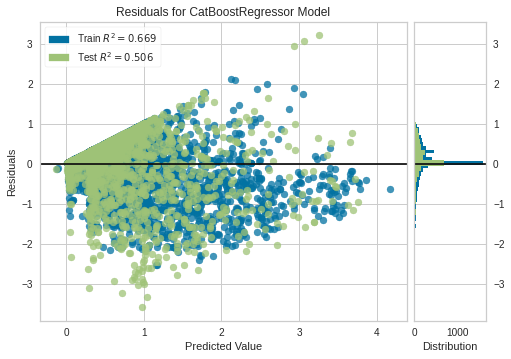

In [ ]:
plot_model(tuned_cb)

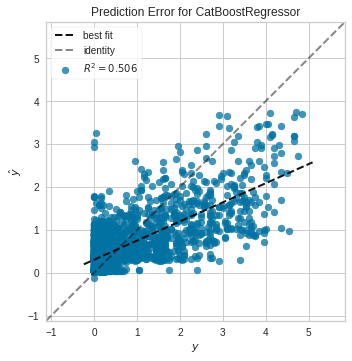

In [ ]:
plot_model(tuned_cb, plot = 'error')

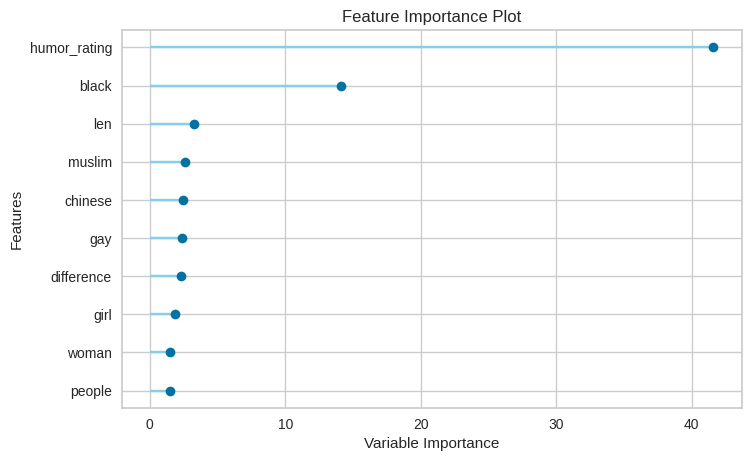

In [ ]:
# Check feature importance
plot_model(tuned_cb, plot='feature')

In [ ]:
# Predict on test data
predict_model(tuned_cb)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.46,0.5022,0.7087,0.5058,0.3376,1.5145


,len,humor_rating,abc,ability,able,abraham,abroad,absolutely,academy,accept,acceptable,accepted,accepting,access,accident,accidentally,according,account,accurate,acid,ackles,acne,across,act,acting,action,actions,active,activity,actor,actors,acts,actual,actually,ad,adapt,add,added,addicted,addiction,...,supplies_0.0,surrender_0.0,survival_0.37209171056747437,switching_0.0,tackle_0.0,tax_0.30993276834487915,telescope_0.35609695315361023,tent_0.7229565978050232,testicles_0.0,thru_0.2562498450279236,tickets_0.3535904586315155,tip_0.0,toasted_0.0,toe_0.0,tragedy_0.36657610535621643,trailer_0.0,tranny_0.0,traveling_0.38768377900123596,trucks_0.0,tweeted_0.5409583449363708,ty_0.6369664669036865,umbrella_0.4237499535083771,understands_0.0,unit_0.0,upcoming_0.5577437877655029,urged_0.0,valentines_0.49814552068710327,vaping_0.0,various_0.40092167258262634,vibes_0.35284948348999023,virginity_0.0,volume_0.0,voted_0.0,wasted_0.0,whites_0.39293089509010315,wildly_0.0,yodas_0.0,zebra_0.0,offense_rating,Label
0,25.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.45,0.302865
1,12.0,2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.00,0.705003
2,19.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.00,0.037530
3,57.0,2.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.00,0.887049
4,10.0,2.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.00,0.555129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,14.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.95,0.334268
2397,22.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.00,0.040686
2398,36.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,

In [ ]:
# Save model
save_model(tuned_cb,'Final Model-4')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='offense_rating',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='offense_rating')),
                 ('fix_perfect', Remove_100(target='offense_rating')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', '